In [14]:
#Svi importovi
import nltk
import subprocess
import nltk.corpus  
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, brown
from collections import Counter
from nltk.text import Text 
import os
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
path_to_gs = "C:\Program Files\gs\gs9.56.1"
os.environ['PATH']+=os.pathsep + path_to_gs

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\istankovic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\istankovic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\istankovic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\istankovic\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\istankovic\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
# Učitavanje teksutalnog dokumenta za obradu i preborajvanje elementa
book = open("C:\\Users\\istankovic\\Desktop\\spremink\\projekt\\Analiza teksta 2\\harry_potter_2.txt", "r", encoding = "UTF-8")
book_raw = book.read()
print('Broj znakova: ',len(book_raw))

Broj znakova:  516452


In [16]:
# 1. Normalizacija teksta
#Prebaciti sve u mala slova
book_lowercase = book_raw.lower()
print('Nakon normalizacije: \n', book_lowercase[100:200])

Nakon normalizacije: 
 

text copyright © 1998 by j.k. rowling.
illustrations by mary grandpré copyright © 1999 by warner b


In [17]:
# 2. tokenizacija teksta
#Podjela na rečenice
book_tokenized = sent_tokenize(book_lowercase)
print('Broj rečenica: ',len(book_tokenized))

#Podjela na riječi(tokene)
book_tokens = word_tokenize(book_lowercase)
print('Tokena nakon tokeniziranje ima: ', len(book_tokens))

Broj rečenica:  6116
Tokena nakon tokeniziranje ima:  116960


In [18]:
# 3. Pročistiti tekst od suvišnih elemenata
# Uklanjaju se ne-alfanumerički znakovi, ali brojevi ostaju
book_tokens_clean = [word for word in book_tokens if word.isalpha()]
print('Ukupan broj tokena bez ne-alfanumeričkih znakova: ', len(book_tokens_clean))

Ukupan broj tokena bez ne-alfanumeričkih znakova:  91384


In [19]:
# 4. Stemming teksta
# Stemtatizacija
porter = nltk.PorterStemmer()
stemedList = []
for word in book_tokens_clean:
    stemedList.append(porter.stem(word))
    
print(stemedList[0:50])

['harri', 'potter', 'and', 'the', 'chamber', 'of', 'secret', 'by', 'rowl', 'illustr', 'by', 'mari', 'grandpré', 'text', 'copyright', 'by', 'rowl', 'illustr', 'by', 'mari', 'grandpré', 'copyright', 'by', 'warner', 'harri', 'potter', 'charact', 'name', 'and', 'relat', 'indicia', 'are', 'trademark', 'of', 'and', 'warner', 'ent', 'harri', 'potter', 'publish', 'right', 'rowl', 'thi', 'digit', 'edit', 'first', 'publish', 'by', 'pottermor', 'limit']


In [20]:
# 5. Lematizacija
wnl = nltk.WordNetLemmatizer()
book_lemma_list = []
for word in book_tokens_clean:
    book_lemma_list.append(wnl.lemmatize(word))

print(book_lemma_list[0:50])

['harry', 'potter', 'and', 'the', 'chamber', 'of', 'secret', 'by', 'rowling', 'illustration', 'by', 'mary', 'grandpré', 'text', 'copyright', 'by', 'rowling', 'illustration', 'by', 'mary', 'grandpré', 'copyright', 'by', 'warner', 'harry', 'potter', 'character', 'name', 'and', 'related', 'indicia', 'are', 'trademark', 'of', 'and', 'warner', 'ent', 'harry', 'potter', 'publishing', 'right', 'rowling', 'this', 'digital', 'edition', 'first', 'published', 'by', 'pottermore', 'limited']


In [21]:
# 6. Maknuti stop words
print('Broj tokena prije uklanjanja stop words: ', len(book_lemma_list))
no_stop_words = [word for word in book_lemma_list if not word in stopwords.words("english")]
print('Ukupan broj tokena nakon obrade: ', len(no_stop_words))

Broj tokena prije uklanjanja stop words:  91384
Ukupan broj tokena nakon obrade:  48783


In [22]:
# 7. Izračunati frekvencije riječi u listi i sa prikazom u grafičkom obliku
word_count = Counter(no_stop_words)
print('Pojavnost 20 najčešćih riječi nakon lematizacije i stematizacije:\n\n', word_count.most_common(20))

Pojavnost 20 najčešćih riječi nakon lematizacije i stematizacije:

 [('harry', 1752), ('wa', 1328), ('said', 1217), ('ron', 721), ('hermione', 328), ('back', 288), ('one', 247), ('lockhart', 235), ('malfoy', 221), ('could', 214), ('professor', 197), ('got', 193), ('like', 186), ('know', 183), ('around', 182), ('time', 182), ('weasley', 180), ('eye', 176), ('hagrid', 169), ('looked', 163)]


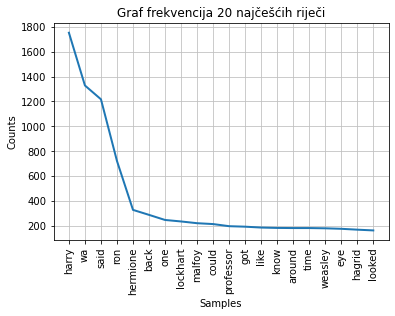

<AxesSubplot:title={'center':'Graf frekvencija 20 najčešćih riječi'}, xlabel='Samples', ylabel='Counts'>

In [23]:
fd = nltk.FreqDist(no_stop_words)
pojavnost = fd.most_common(20)
fd.plot(20,title='Graf frekvencija 20 najčešćih riječi')

In [24]:
# 8. Prikazati concordance za najfrekventnije riječi
pojavnost2 = []

# pojavnost ima key i value vrijednosti (rijeci i frekvencije)
# ovime se izdvajaju samo najcesce koristenih "n" rijeci iz prethodnog bloka

for rijec in pojavnost:
    pojavnost2.append(rijec[0])
    
tokens1 = nltk.word_tokenize(book_raw)
text1 = nltk.Text(no_stop_words)

for p in pojavnost2:
    text1.concordance(p)
    print("\n")

Displaying 25 of 1752 matches:
 harry potter chamber secret rowling illust
ation mary grandpré copyright warner harry potter character name related indici
related indicia trademark warner ent harry potter publishing right rowling digi
nique online experience built around harry potter book share participate story 
wcase creativity discover even world harry potter author visit seán harris geta
ur morning loud hooting noise nephew harry room third time week roared across t
k roared across table control owl go harry tried yet explain bored said used fl
let exchanged dark look wife petunia harry tried argue back word drowned long l
er side kitchen chair grinned turned harry pas frying forgotten magic word said
pas frying forgotten magic word said harry irritably effect simple sentence res
n throbbing temple meant please said harry quickly mean told thundered uncle sp
ed tolerate mention abnormality roof harry stared uncle pale aunt wa trying hea
 trying heave dudley foot right said harry ri

In [26]:
# 9. Prikazati kolokacije
text1 = nltk.Text(tokens1)
text1.collocation_list()

[('Professor', 'McGonagall'),
 ('said', 'Ron'),
 ('Uncle', 'Vernon'),
 ('said', 'Harry'),
 ('Mrs.', 'Weasley'),
 ('Harry', 'Potter'),
 ('Nearly', 'Headless'),
 ('Mr.', 'Weasley'),
 ('Headless', 'Nick'),
 ('Madam', 'Pomfrey'),
 ('Aunt', 'Petunia'),
 ('Gilderoy', 'Lockhart'),
 ('Moaning', 'Myrtle'),
 ('Mr.', 'Malfoy'),
 ('Sorting', 'Hat'),
 ('Great', 'Hall'),
 ('Mrs.', 'Norris'),
 ('Professor', 'Sprout'),
 ('hospital', 'wing'),
 ('common', 'room')]

In [ ]:
text1.dispersion_plot(pojavnost2)

In [27]:
# 10. Izračunati leksički diverzificitet 
def lexical_diversity(text):
    return len(set(text)) / len(text)
def percentage(count, total):
    return 100 * count / total

print('Lexical diversity = ', lexical_diversity(no_stop_words), '\n')
print('Percentage of word "' + pojavnost2[0] + '" = ', percentage(no_stop_words.count(pojavnost2[0]), len(no_stop_words)))
print('Percentage of word "' + pojavnost2[1] + '" = ', percentage(no_stop_words.count(pojavnost2[1]), len(no_stop_words)))
print('Percentage of word "' + pojavnost2[2] + '" = ', percentage(no_stop_words.count(pojavnost2[2]), len(no_stop_words)))

Lexical diversity =  0.12668347580099626 

Percentage of word "harry" =  3.5914150421253304
Percentage of word "wa" =  2.7222598036201138
Percentage of word "said" =  2.494721521841625


In [20]:
# 11. Prikazati primjer primjene korpusa teksta npr Brown.
print('Dostupne Brown kategorije:\n', brown.categories())
genres = brown.categories()

# Snaga zaključivanja nije velika jer su najfrekventnije riječi imena likova
words = pojavnost2[:5]
for i in range(0,len(genres)):
    genre = genres[i]
    print()
    print("Provjera pojavnosti u kategoriji '"+ genre + "' za riječi:")
    genre_text = brown.words(categories = genre)
    fdist = nltk.FreqDist(genre_text)
    for w in words:
        print(w + ':', fdist[w], end=' ')
    print('\n')
    
print("="*50)


# Više ima smisla ispustiti imena
words = pojavnost2[1],pojavnost2[5],pojavnost2[6],pojavnost2[14],pojavnost2[17]

for i in range(0,len(genres)):
    genre = genres[i]
    print()
    print("Provjera pojavnosti u kategoriji '"+ genre + "' za riječi:")
    genre_text = brown.words(categories = genre)
    fdist = nltk.FreqDist(genre_text)
    for w in words:
        print(w + ':', fdist[w], end=' ')
    print('\n')

Dostupne Brown kategorije:
 ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']

Provjera pojavnosti u kategoriji 'adventure' za riječi:
dudley: 0 around: 71 dumbledore: 0 snape: 0 looked: 62 


Provjera pojavnosti u kategoriji 'belles_lettres' za riječi:
dudley: 0 around: 57 dumbledore: 0 snape: 0 looked: 39 


Provjera pojavnosti u kategoriji 'editorial' za riječi:
dudley: 0 around: 20 dumbledore: 0 snape: 0 looked: 3 


Provjera pojavnosti u kategoriji 'fiction' za riječi:
dudley: 0 around: 71 dumbledore: 0 snape: 0 looked: 72 


Provjera pojavnosti u kategoriji 'government' za riječi:
dudley: 0 around: 6 dumbledore: 0 snape: 0 looked: 2 


Provjera pojavnosti u kategoriji 'hobbies' za riječi:
dudley: 0 around: 41 dumbledore: 0 snape: 0 looked: 6 


Provjera pojavnosti u kategoriji 'humor' za riječi:
dudley: 0 around: 15 dumbledore: 0 snape: 0 looked: 13 


In [28]:
# 12. Tagirati riječi i prikazati lingvističko stablo na temelju vlastitog uzorka teksta
sent1 = book_tokenized[9]
print(sent1)
tokens1 = word_tokenize(sent1)
print(tokens1)
sent_tokens1 = nltk.pos_tag(word_tokenize(sent1))
sent_tokens1

“third time this week!” he roared across the table.
['“', 'third', 'time', 'this', 'week', '!', '”', 'he', 'roared', 'across', 'the', 'table', '.']


[('“', 'JJ'),
 ('third', 'JJ'),
 ('time', 'NN'),
 ('this', 'DT'),
 ('week', 'NN'),
 ('!', '.'),
 ('”', 'NN'),
 ('he', 'PRP'),
 ('roared', 'VBD'),
 ('across', 'IN'),
 ('the', 'DT'),
 ('table', 'NN'),
 ('.', '.')]

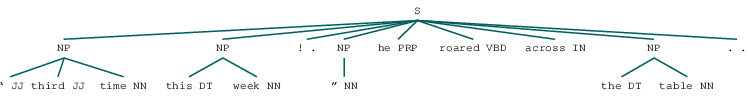

In [29]:
grammar_np = r"NP: {<DT>?<JJ>*<NN>}" 
chunk_parser1 = nltk.RegexpParser(grammar_np)
chunk_result1 = chunk_parser1.parse(sent_tokens1)
chunk_result1

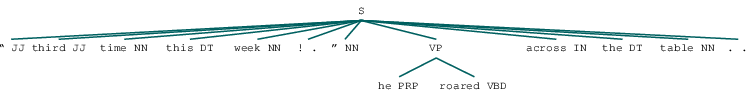

In [30]:
grammar_vp = r"VP: {<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>?}"
chunk_parser2 = nltk.RegexpParser(grammar_vp)
sent2 = sent1
sent_tokens2 = nltk.pos_tag(word_tokenize(sent2))
sent_tokens2
chunk_result2 = chunk_parser2.parse(sent_tokens2)
chunk_result2